Dataset : Online Courses from Harvard and MIT

Description : In 2012, the Massachusetts Institute of Technology (MIT) and Harvard University launched open online courses on edX, a non-profit learning platform co-founded by the two institutions. Four years later, what have we learned about these online “classrooms” and the global community of learners who take them?

Contents : This report provides data on 290 Harvard and MIT online courses, 250 thousand certifications, 4.5 million participants, and 28 million participant hours on the edX platform since 2012.

Dataset URL : https://www.kaggle.com/edx/course-study


In [1]:
# importing require libraries

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None


In [2]:
# reading data

data = pd.read_csv('appendix.csv')
data.columns

Index([u'Institution', u'Course Number', u'Launch Date', u'Course Title',
       u'Instructors', u'Course Subject', u'Year', u'Honor Code Certificates',
       u'Participants (Course Content Accessed)',
       u'Audited (> 50% Course Content Accessed)', u'Certified', u'% Audited',
       u'% Certified', u'% Certified of > 50% Course Content Accessed',
       u'% Played Video', u'% Posted in Forum', u'% Grade Higher Than Zero',
       u'Total Course Hours (Thousands)', u'Median Hours for Certification',
       u'Median Age', u'% Male', u'% Female',
       u'% Bachelor's Degree or Higher'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 23 columns):
Institution                                     290 non-null object
Course Number                                   290 non-null object
Launch Date                                     290 non-null object
Course Title                                    290 non-null object
Instructors                                     289 non-null object
Course Subject                                  290 non-null object
Year                                            290 non-null int64
Honor Code Certificates                         290 non-null int64
Participants (Course Content Accessed)          290 non-null int64
Audited (> 50% Course Content Accessed)         290 non-null int64
Certified                                       290 non-null int64
% Audited                                       290 non-null float64
% Certified                                     290 non-null float64
% Certified of

In [4]:
data.describe(include='all')

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
count,290,290,290,290,289,290,290.000000,290.000000,290.000000,290.000000,...,290.000000,290,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
unique,2,188,205,202,140,4,NaN,NaN,NaN,NaN,...,NaN,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MITx,6.00.1x,09/21/2015,Introduction to Computer Science and Programming,"Peter Bol, Bill Kirby","Humanities, History, Design, Religion, and Edu...",NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,161,9,11,8,20,94,NaN,NaN,NaN,NaN,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.172414,0.813793,15344.334483,2549.172414,...,31.445655,NaN,9.347517,21.210379,94.981828,44.364552,29.300000,67.010690,32.989310,72.078724
std,NaN,NaN,NaN,NaN,NaN,NaN,0.906301,0.389946,28207.578733,3095.159969,...,19.751102,NaN,7.517141,13.411540,157.617610,43.953709,4.047897,15.843642,15.843642,10.256434
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,322.000000,187.000000,...,0.000000,NaN,0.000000,0.000000,0.110000,0.000000,22.000000,25.240000,6.560000,44.950000
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000,3815.000000,755.250000,...,13.400000,NaN,3.992500,10.590000,12.960000,12.242500,26.000000,54.170000,18.367500,64.515000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000,7901.500000,1517.000000,...,31.270000,NaN,7.245000,19.605000,37.710000,26.965000,29.000000,66.515000,33.485000,73.055000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,18038.250000,3383.000000,...,47.622500,NaN,14.107500,30.902500,97.225000,64.177500,31.000000,81.632500,45.830000,79.245000


The Institute  MITx offered 160+ courses.
Most common course is 6.00.1x,
the date of launch is 09/21/2015,
Most common course opted is Introduction to Computer Science and Programming.
Most common Teacher - Peter Bol, Bill Kirby,
Most common course subject - Humanities, History, Design, Religion, and Education.

In [5]:
# Getting Launch Year from Launch Date

launch_date = pd.to_datetime(data['Launch Date'])
data['Launch Year'] = launch_date.apply(lambda x: x.year)
data['Launch Month'] = launch_date.apply(lambda x: x.month)
data['Launch Day'] = launch_date.apply(lambda x: x.day)

# dividing records between in Non degree & high degree

data['Non Degree'] = 100 - data['% Bachelor\'s Degree or Higher']


In [6]:
# Total Institutions

data.Institution.value_counts().index.tolist()

['MITx', 'HarvardX']

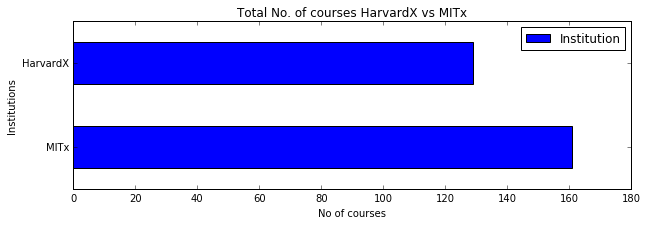

In [7]:
# Total Number of Courses from institutions

data.Institution.value_counts().plot(kind='barh',
                                     figsize=(10, 3),
                                     title="Total No. of courses HarvardX vs MITx",
                                     legend=True)

plt.xlabel('No of courses')
plt.ylabel('Institutions')

Edx forum has been founded in year 2012 by MIT and Harvard University. In total, Harvard university has launched 120+ courses where as MIT has launched approximate 160 so far in 4 different subjects.

In [8]:
# dividing data respective to institution for further analysis

harvard = data[data['Institution'] == 'HarvardX']
mit = data[data['Institution'] == 'MITx']

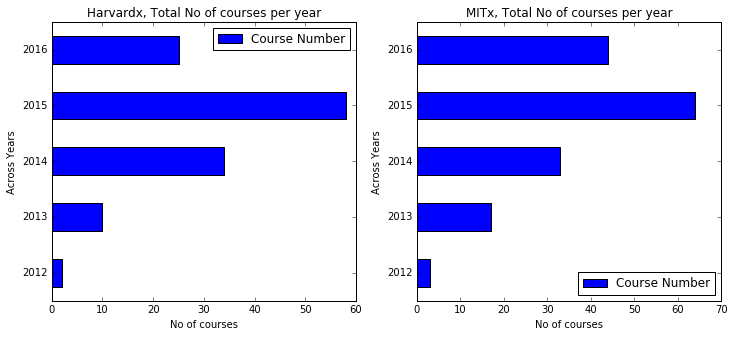

In [9]:
# total number of courses per year

fig, ax = plt.subplots(1, 2)
hdf = harvard.groupby(['Launch Year'])['Course Number'].count()
hdf.plot(kind='barh',
         title='Harvardx, Total No of courses per year',
         ax=ax[0],
         figsize=(12, 5),
         legend=True)

mdf = mit.groupby(['Launch Year'])['Course Number'].count()
mdf.plot(kind='barh',
         title='MITx, Total No of courses per year',
         ax=ax[1],
         figsize=(12, 5),
         legend=True)

ax[0].set_xlabel('No of courses')
ax[0].set_ylabel('Across Years')
ax[1].set_xlabel('No of courses')
ax[1].set_ylabel('Across Years')

As 2012, was the year in which both the universities began with edx courses so the number of courses launched were less in number, can see above. From the year 2013 MITx launched more number of courses than Harvardx consecutively. One more thing which one can observe here is that, 2015 was the year in which both the institutes launched maximum number of courses. 

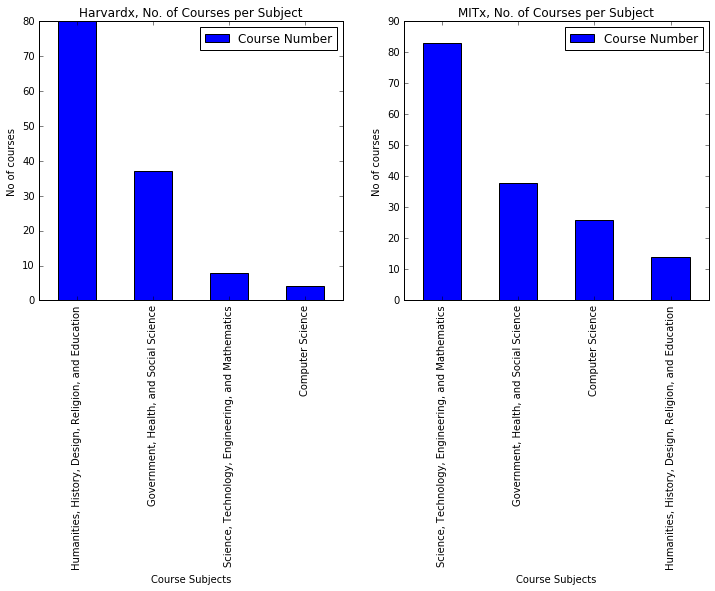

In [10]:
# total number of different courses per subject

fig, ax = plt.subplots(1, 2)

hdf = harvard.groupby(['Course Subject'])['Course Number'].count().sort_values(ascending=False)
hdf.plot(kind='bar',
         ax=ax[0],
         figsize=(12, 5),
         legend=True,
         title="Harvardx, No. of Courses per Subject")

mdf = mit.groupby(['Course Subject'])['Course Number'].count().sort_values(ascending=False)
mdf.plot(kind='bar',
         ax=ax[1],
         figsize=(12, 5),
         legend=True,
         title="MITx, No. of Courses per Subject")


ax[0].set_xlabel('Course Subjects')
ax[0].set_ylabel('No of courses')
ax[1].set_xlabel('Course Subjects')
ax[1].set_ylabel('No of courses')

From 2012, both the universities have been targetting similar subjects, but Harvardx showed more interest in launching multiple courses on subject Humanities, History, Design, Religion and Education where as MITx showed more interest towards Science, Technology, Engineering and Mathematics. Interesting thing to see is courses on subject Goverment, Health and Social Science have almost got equal attention from both the universities so far.

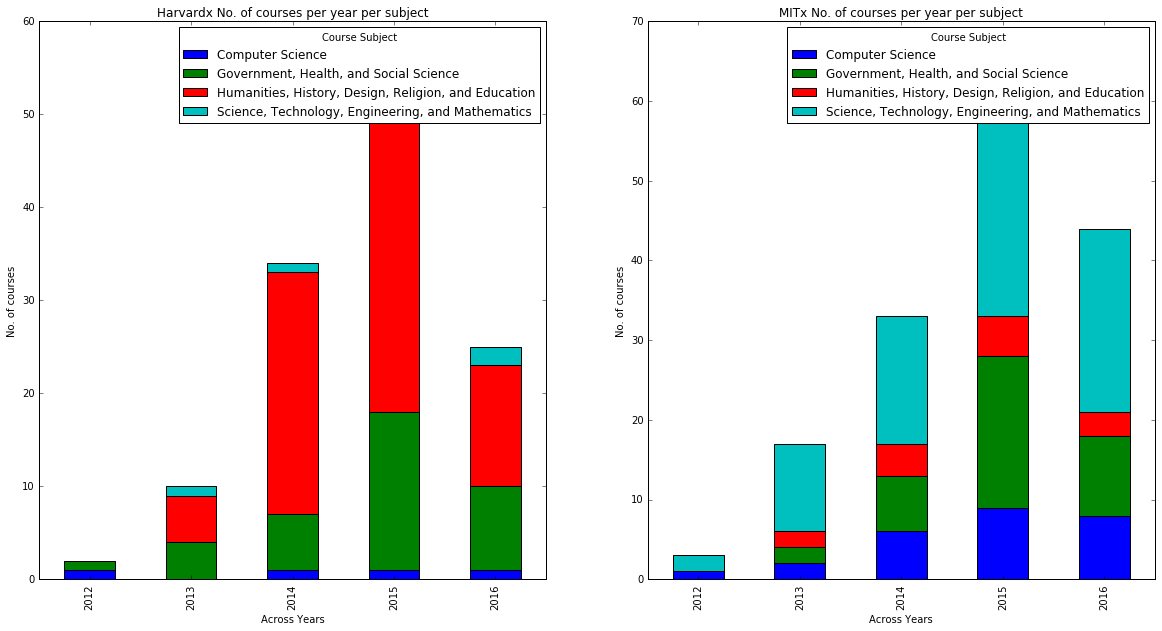

In [11]:
# number of different courses per subject per year

fig, ax = plt.subplots(1, 2)
df = harvard.groupby(['Launch Year', 'Course Subject'])['Course Number'].count()
df.unstack().fillna(0).plot.bar(stacked=True,
                                figsize=(20, 10),
                                title="Harvardx No. of courses per year per subject",
                                ax=ax[0])

df = mit.groupby(['Launch Year', 'Course Subject'])['Course Number'].count()
df.unstack().fillna(0).plot.bar(stacked=True,
                                figsize=(20, 10),
                                title="MITx No. of courses per year per subject",
                                ax=ax[1])

ax[0].set_ylabel('No. of courses')
ax[0].set_xlabel('Across Years')
ax[1].set_ylabel('No. of courses')
ax[1].set_xlabel('Across Years')

This is a pictorial representation to show distribution of course subjects across years. Through this representation one can observe that course subject Humanities, History, Design, Religion and Education is the most preferred by Harvardx through the years, where as Science, Technology, Engineering and Mathematics by MITx. 

Apart from this, Harvardx has consecutively launched only one course for Computer Science but in 2013. Goverment, Health and Social Science gained attention from 2012 to 2015 but in 2016 by both the universities.


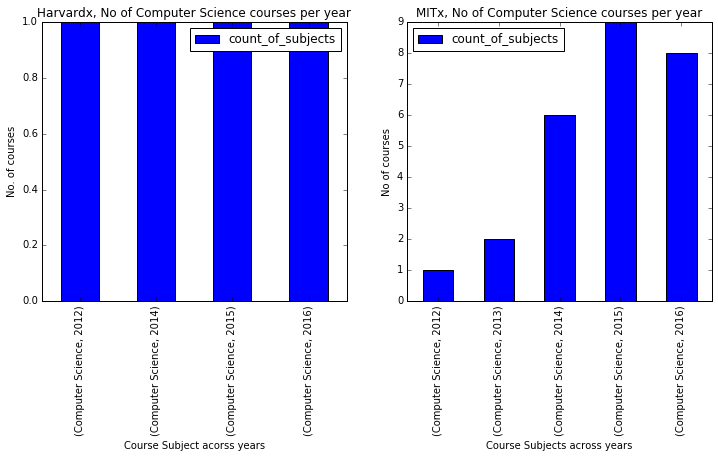

In [12]:
# shifting to computer science subject primarily

# total number of compuer science courses
fig, ax = plt.subplots(1, 2)
hdf = harvard[harvard['Course Subject'] == 'Computer Science']
hdf['count_of_subjects'] = 1

mdf = mit[mit['Course Subject'] == 'Computer Science']
mdf['count_of_subjects'] = 1

hdf = hdf.groupby(['Course Subject', 'Launch Year'])['count_of_subjects'].sum()
hdf.plot(kind='bar',
        legend=True,
        ax=ax[0],
          figsize=(12, 5),
          title="Harvardx, No of Computer Science courses per year")

mdf = mdf.groupby(['Course Subject', 'Launch Year'])['count_of_subjects'].sum()
mdf.plot(kind='bar',
         legend=True,
         ax=ax[1],
         figsize=(12, 5),
         title="MITx, No of Computer Science courses per year")

ax[0].set_ylabel('No. of courses')
ax[0].set_xlabel('Course Subject acorss years')
ax[1].set_xlabel('Course Subjects across years')
ax[1].set_ylabel('No of courses')

so far one can see that computer science is less fascinating for Harvardx when compared to MITx as it launched only 1 course throughout this period (2012 - 2016 except of 2013 seen above). MITx has been launching different courses for this subject since the begining as one can see the growing graph through the years which tells the number of new courses launched by MITx. 2015 is the most prominent year of MITx in which it launched in total 9 different courses in computer science. 

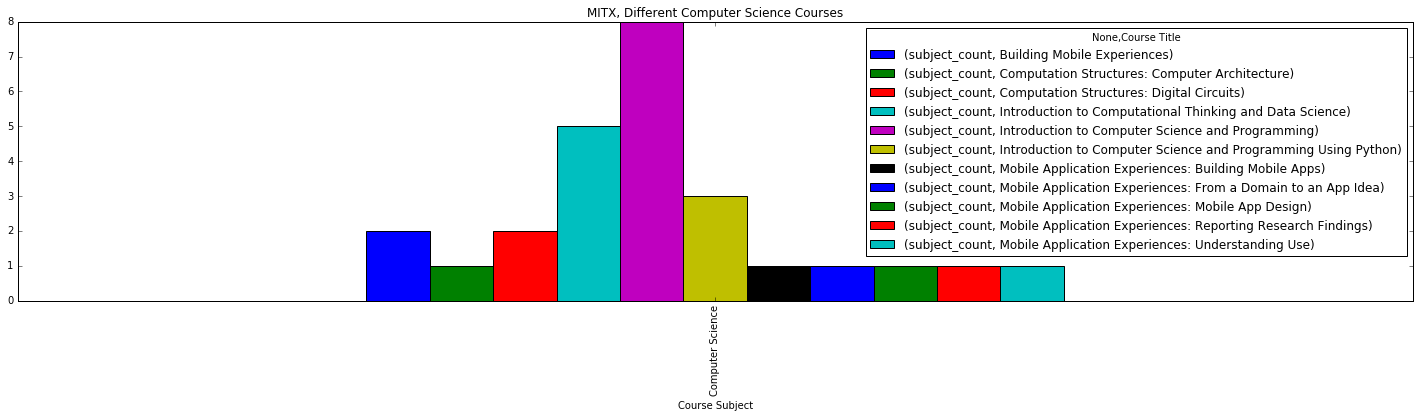

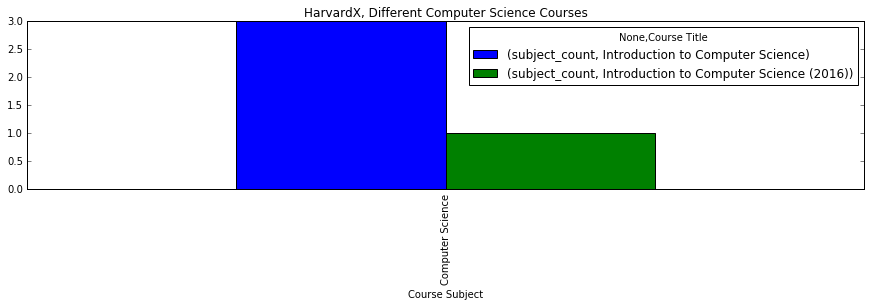

In [13]:
# different computer science courses by both the universities

df = mit[mit['Course Subject'] == 'Computer Science']
df['subject_count'] = 1

pd.pivot_table(df, index=['Course Subject'],
               columns=['Course Title'],
               values=['subject_count'],
               aggfunc=np.sum).plot(kind='bar',
                                    legend=True,
                                    figsize=(25, 5),
                                    title="MITX, Different Computer Science Courses")

df = harvard[harvard['Course Subject'] == 'Computer Science']

df['subject_count'] = 1
pd.pivot_table(df, index=['Course Subject'],
               columns=['Course Title'],
               values=['subject_count'],
               aggfunc=np.sum).plot(kind='bar',
                                    legend=True,
                                    figsize=(15, 3),
                                    title="HarvardX, Different Computer Science Courses")



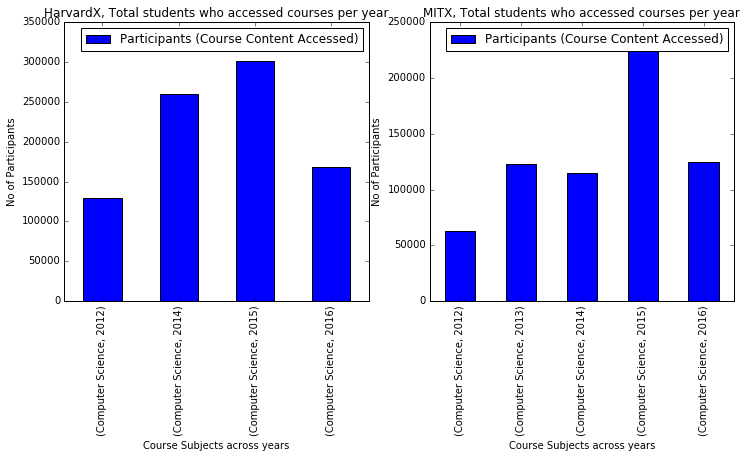

In [14]:
# total number of students who accessed content provided by both the universities

fig, ax = plt.subplots(1, 2)
df = harvard[harvard['Course Subject'] == 'Computer Science']

df = df.groupby(['Course Subject', 'Launch Year'])['Participants (Course Content Accessed)'].sum()
df.plot(kind='bar',
        ax=ax[0],
        legend=True,
        title="HarvardX, Total students who accessed courses per year",
        figsize=(12, 5))


df = mit[mit['Course Subject'] == 'Computer Science']
df = df.groupby(['Course Subject', 'Launch Year'])['Participants (Course Content Accessed)'].sum()
df.plot(kind='bar',
        title="MITX, Total students who accessed courses per year",
        legend=True,
        ax=ax[1],
        figsize=(12, 5))

ax[0].set_xlabel('Course Subjects across years')
ax[0].set_ylabel('No of Participants')
ax[1].set_xlabel('Course Subjects across years')
ax[1].set_ylabel('No of Participants')

This representation is about how many students participated for the courses across the years. Since the begining harvardx was successful to attract more students than MITx. I would like to point out here that harvardx launched only one course which was Introduction to Computer Science where as MITx launched multiple courses throughout the period.

As one can see, 2015 was the prominent year in which total number of students reached around 300K for harvardx and 250K for MITx.

Interesting thing to note here is that, although MITx launched a total of 9 courses in 2015 but still a single course from harvardx managed to gather more audience than MITx. 

David J. Malan really rocked in 2015, I would say :)

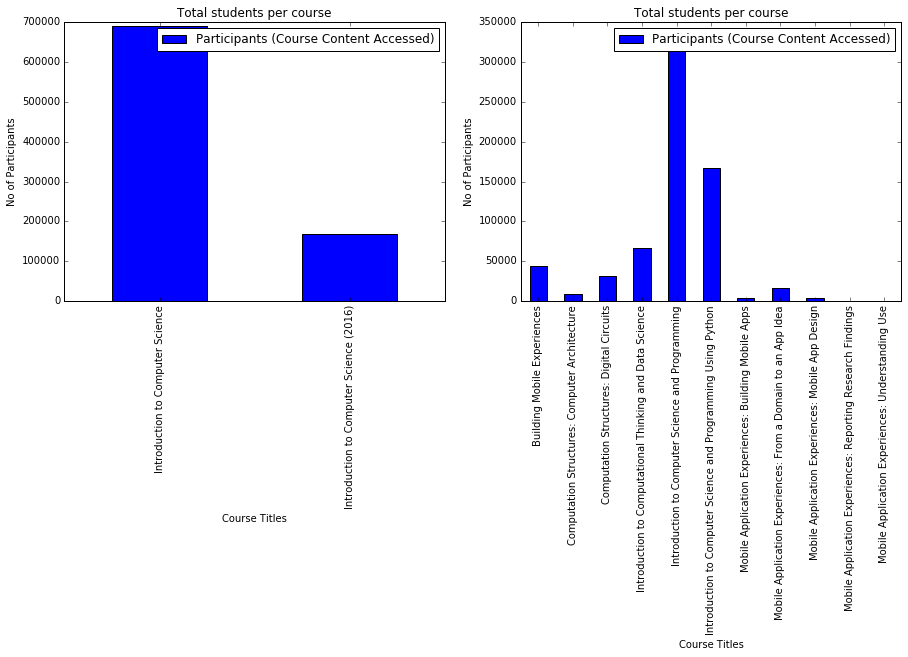

In [15]:
# total number of students per course

fig, ax = plt.subplots(1, 2)
df = harvard[(harvard['Course Subject'] == 'Computer Science')]

gender = df.groupby(['Course Title'])['Participants (Course Content Accessed)'].sum()
gender.plot(kind='bar',
            title="Total students per course",
            ax=ax[0],
            figsize=(15, 5),
            legend=True)

df = mit[(mit['Course Subject'] == 'Computer Science')]
gender = df.groupby(['Course Title'])['Participants (Course Content Accessed)'].sum()
gender.plot(kind='bar',
            title="Total students per course",
            ax=ax[1],
            figsize=(15, 5),
            legend=True)

ax[0].set_xlabel('Course Titles')
ax[0].set_ylabel('No of Participants')
ax[1].set_xlabel('Course Titles')
ax[1].set_ylabel('No of Participants')

No need to emphasize here for this representation. Clearly, harvardx managed to gather more audience for its courses than MITx so far.

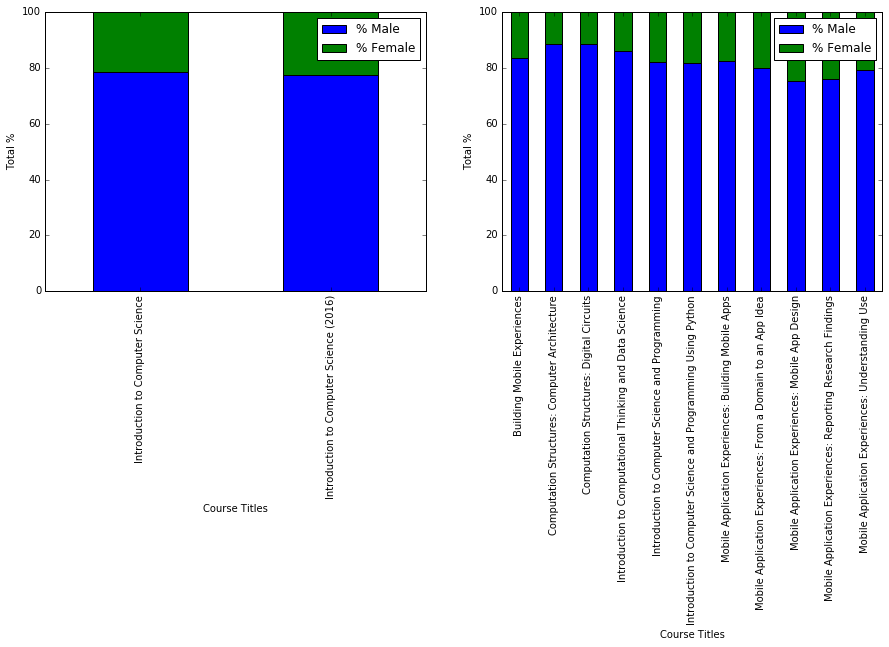

In [16]:
# % Male & Female ratio throughout the courses

fig, ax = plt.subplots(1, 2)
df = harvard[(harvard['Course Subject'] == 'Computer Science')]

gender = df.groupby(['Course Title'])['% Male', '% Female'].mean()
gender.plot(kind='bar',
          stacked=True,
          ax=ax[0],
          figsize=(15, 5),
          legend=True)

df = mit[(mit['Course Subject'] == 'Computer Science')]
gender = df.groupby(['Course Title'])['% Male', '% Female'].mean()
gender.plot(kind='bar',
          stacked=True,
          ax=ax[1],
          figsize=(15, 5),
          legend=True)

ax[0].set_xlabel('Course Titles')
ax[0].set_ylabel('Total %')
ax[1].set_xlabel('Course Titles')
ax[1].set_ylabel('Total %')

Ratio of Male vs Female is almost equal for Harvardx courses (80 / 20 approx) but this is stagnant in case of MITx so far. Most of the courses from MITx also managed to keep the ratio (80 / 20 approx) but would like to point out 3 courses for Mobile Application Designs launched in 2016 managed to shift this ratio a little bit which means females were more interested in Mobile Applicaion Domain than others Domains from MITx.

The core reason, I would guess, this domain is booming in the market right now. Another one it contains less complex concepts from computer science so easy for all. 

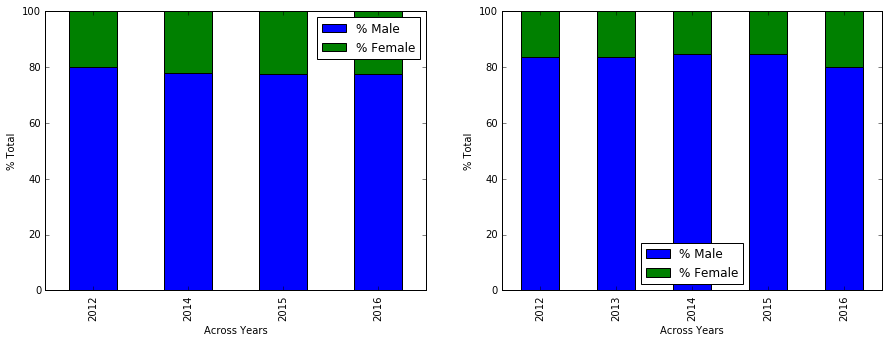

In [17]:
# % Male & Female ratio throughout the period

fig, ax = plt.subplots(1, 2)
df = harvard[(harvard['Course Subject'] == 'Computer Science')]

gender = df.groupby(['Launch Year'])['% Male', '% Female'].mean()
gender.plot(kind='bar',
          stacked=True,
          ax=ax[0],
          figsize=(15, 5),
          legend=True)

df = mit[(mit['Course Subject'] == 'Computer Science')]
gender = df.groupby(['Launch Year'])['% Male', '% Female'].mean()
gender.plot(kind='bar',
          stacked=True,
          ax=ax[1],
          figsize=(15, 5),
          legend=True)

ax[0].set_xlabel('Across Years')
ax[0].set_ylabel('% Total')
ax[1].set_xlabel('Across Years')
ax[1].set_ylabel('% Total')

I would like to point out the year 2016 for MITx which shifted the ratio little bit as explained above.

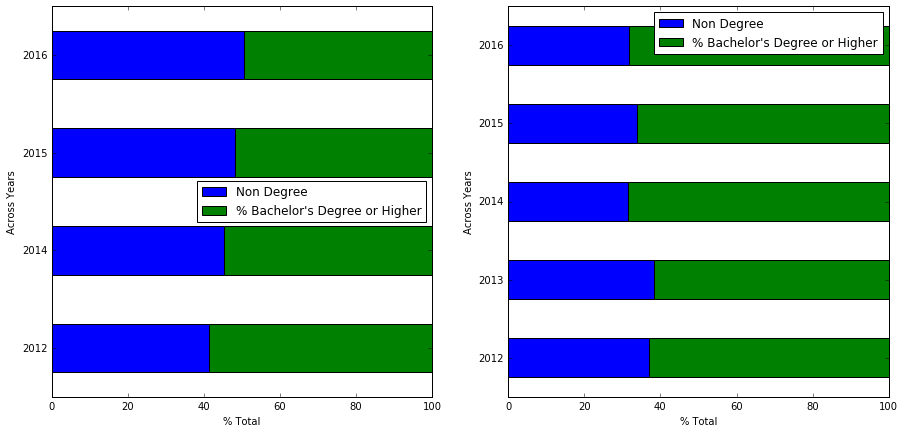

In [18]:
# Non Degree vs Higher Degree across years

fig, ax = plt.subplots(1, 2)

df = harvard[harvard['Course Subject'] == 'Computer Science']

df = df.groupby(['Launch Year'])['Non Degree', '% Bachelor\'s Degree or Higher'].mean()
df.plot(kind='barh',
        ax=ax[0],
        stacked=True,
        figsize=(15, 7))

df = mit[mit['Course Subject'] == 'Computer Science']

df = df.groupby(['Launch Year'])['Non Degree', '% Bachelor\'s Degree or Higher'].mean()
df.plot(kind='barh',
        ax=ax[1],
        stacked=True,
        figsize=(15, 7))

ax[0].set_xlabel('% Total')
ax[0].set_ylabel('Across Years')
ax[1].set_xlabel('% Total')
ax[1].set_ylabel('Across Years')

Here, I am using a columns '% Bachelor\'s Degree or Higher' which says how many students are from Bachelor Degree or the Higher one (according to my understanding looking at data). By this knowledge, I got the '% Non Degree' students and performed an analysis. This analysis shows the is the ratio of Non Degree vs Bachelor\'s Degree or Higher for respective years.

I would like to point out one fascinating thing here, harvardx has managed to gather both Non Degree and Higher Degree students but MITx courses mostly taken by Higher Degree students.

The reason can be as 'Introduction to Computer Science' is a basic computer programming course where courses launched by MITx are mostly skills' oriented. 

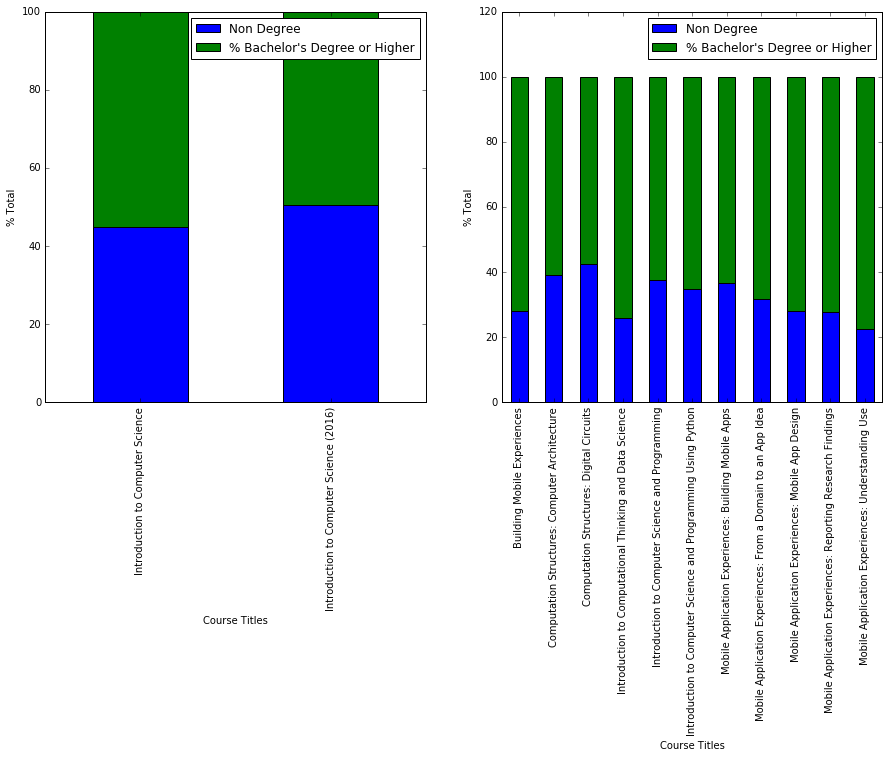

In [19]:
# Non Degree vs Higher Degree across courses

fig, ax = plt.subplots(1, 2)

df = harvard[harvard['Course Subject'] == 'Computer Science']

df = df.groupby(['Course Title'])['Non Degree', '% Bachelor\'s Degree or Higher'].mean()
df.plot(kind='bar',
        ax=ax[0],
        stacked=True,
        figsize=(15, 7))

df = mit[mit['Course Subject'] == 'Computer Science']

df = df.groupby(['Course Title'])['Non Degree', '% Bachelor\'s Degree or Higher'].mean()
df.plot(kind='bar',
        ax=ax[1],
        stacked=True,
        figsize=(15, 7))

ax[0].set_xlabel('Course Titles')
ax[0].set_ylabel('% Total')
ax[1].set_xlabel('Course Titles')
ax[1].set_ylabel('% Total')

As, I mentioned above that mostly MITx courses have been opted by Higher Degree holders or professionals as these courses mostly focus on building skillsets according to market.

One can validate my above statement by this analysis.

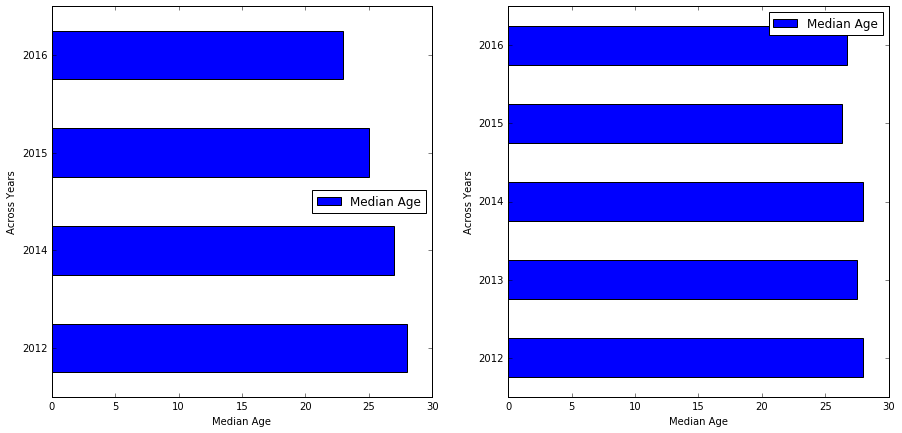

In [20]:
# Median agae of students across years

fig, ax = plt.subplots(1, 2)
df = harvard[harvard['Course Subject'] == 'Computer Science']
df.groupby('Launch Year')['Median Age'].mean().plot(kind='barh',
                                                    ax=ax[0],
                                                    figsize=(15, 7),
                                                    legend=True)


df = mit[mit['Course Subject'] == 'Computer Science']
df.groupby('Launch Year')['Median Age'].mean().plot(kind='barh',
                                                    ax=ax[1],
                                                    figsize=(15, 7),
                                                    legend=True)

ax[0].set_xlabel('Median Age')
ax[0].set_ylabel('Across Years')
ax[1].set_xlabel('Median Age')
ax[1].set_ylabel('Across Years')

For Harvardx the minimum median age for a student is 20+ and the maximum is 25+ which says it managed to target both type (Non Degree, Higher Degree) of audience where as for MITx the minimum age is 25+ which says it managed to target mostly Higher Degree students.

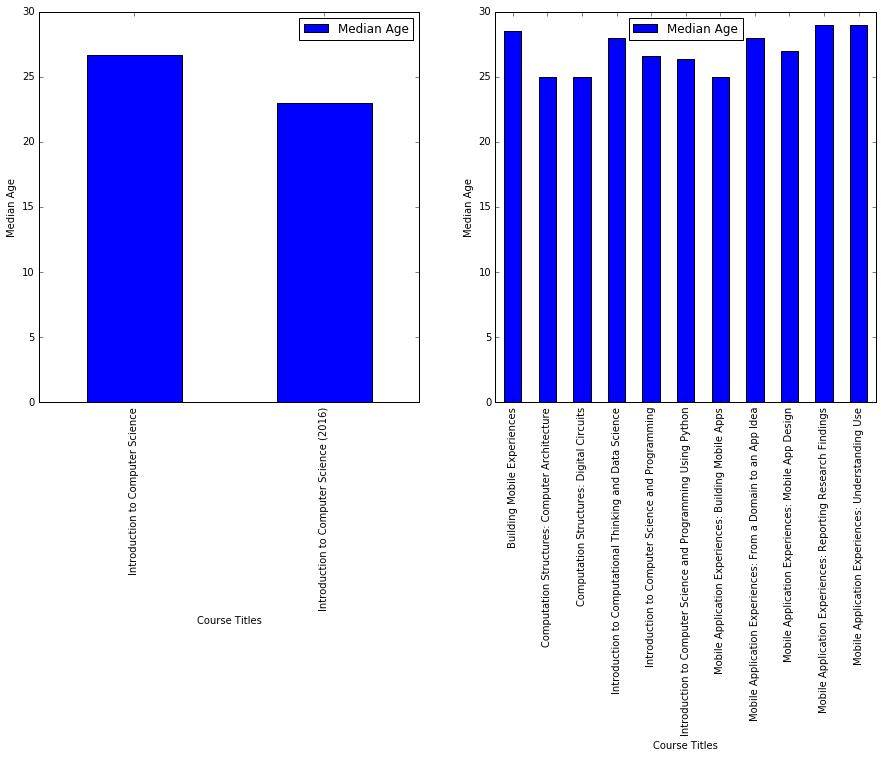

In [21]:
# Median agae of students across courses

fig, ax = plt.subplots(1, 2)
df = harvard[harvard['Course Subject'] == 'Computer Science']
df.groupby('Course Title')['Median Age'].mean().plot(kind='bar',
                                                     ax=ax[0],
                                                     legend=True,
                                                     figsize=(15, 7))


df = mit[mit['Course Subject'] == 'Computer Science']
df.groupby('Course Title')['Median Age'].mean().plot(kind='bar',
                                                     ax=ax[1],
                                                     legend=True,
                                                     figsize=(15, 7))

ax[0].set_xlabel('Course Titles')
ax[0].set_ylabel('Median Age')
ax[1].set_xlabel('Course Titles')
ax[1].set_ylabel('Median Age')

For Harvardx the minimum median age for a student is 20+ and the maximum is 25+ which says it managed to target both type (Non Degree, Higher Degree) of audience where as for MITx the minimum age is 25+ which says it managed to target mostly Higher Degree students.

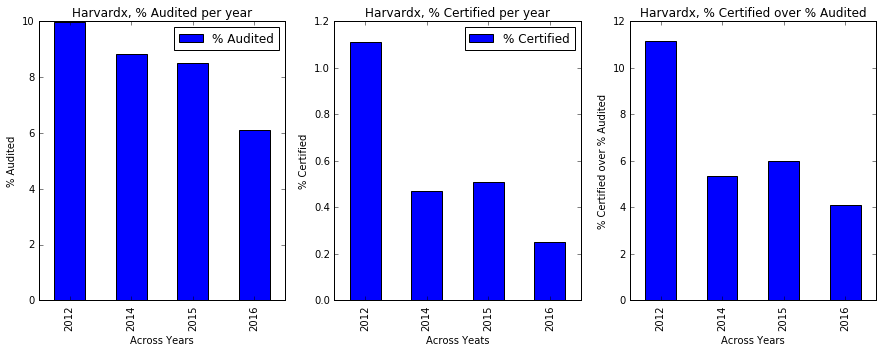

In [22]:
# % Certified over % Audited for Harvardx

fig, ax = plt.subplots(1, 3)
df = harvard[(harvard['Course Subject'] == 'Computer Science')]
certified = df.groupby(['Launch Year'])['% Certified'].mean()
audited = df.groupby(['Launch Year'])['% Audited'].mean()
audited.plot(kind='bar',
             ax=ax[0],
             figsize=(15, 5),
             legend=True,
             title="Harvardx, % Audited per year")

certified.plot(kind='bar',
               ax=ax[1],
               figsize=(15, 5),
               legend=True,     
               title="Harvardx, % Certified per year")

((certified / audited) * 100).plot(kind='bar',
                                   ax=ax[2],
                                   figsize=(15, 5),
                                   title="Harvardx, % Certified over % Audited")

ax[0].set_xlabel('Across Years')
ax[0].set_ylabel('% Audited')
ax[1].set_xlabel('Across Yeats')
ax[1].set_ylabel('% Certified')
ax[2].set_xlabel('Across Years')
ax[2].set_ylabel('% Certified over % Audited')


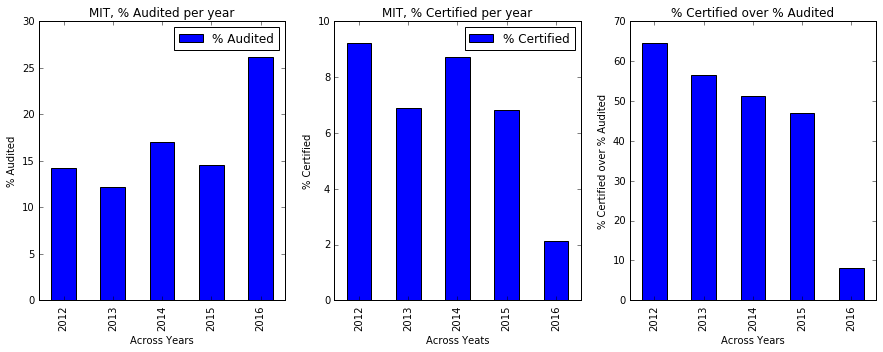

In [23]:
# % Certified over % Audited for MITx

fig, ax = plt.subplots(1, 3)
df = mit[(mit['Course Subject'] == 'Computer Science')]
certified = df.groupby(['Launch Year'])['% Certified'].mean()
audited = df.groupby(['Launch Year'])['% Audited'].mean()

audited.plot(kind='bar',
             ax=ax[0],
             figsize=(15, 5),
             legend=True,
             title="MIT, % Audited per year")

certified.plot(kind='bar',
               ax=ax[1],
               figsize=(15, 5),
               legend=True,
               title="MIT, % Certified per year")

((certified / audited) * 100).plot(kind='bar',
                                   ax=ax[2],
                                   figsize=(15, 5),
                                   title="% Certified over % Audited")

ax[0].set_xlabel('Across Years')
ax[0].set_ylabel('% Audited')
ax[1].set_xlabel('Across Yeats')
ax[1].set_ylabel('% Certified')
ax[2].set_xlabel('Across Years')
ax[2].set_ylabel('% Certified over % Audited')

Conclusion -  I have analysed the data of edx online course forum here which has around of 290 rows and talks primarily about two world famous universities Harvardx and MITx. It contains all the information of the courses which had been launched so far through this online portal. I performed an analysis over this dataset and tried to find out which is most popular university over other in terms of higher audience based on computer science subject.

a) I have found many interesting points while analyzing this dataset such as Harvardx launched only 1 basic programming course from 2012 to 2016 in computer science subject where as MITx launched multiple courses throughout this period.

b) 2015 was the prominent year in terms of launching courses as well as reached to a milestone of targetting 300k students by Harvardx and 250k by MITx.

c) Harvardx gathered audience from Non Degree as well as Higher Degree as it launched basic programming course in computer science where MITx gathered mostly the Higher Degree students as MITx launched more number of skills' oriented courses. 